# Using Pyndamics to Perform Bayesian Parameter Estimation in Dynamical Systems

Pyndamics provides a way to describe a dynamical system in terms of the differential equations, or the stock-flow formalism. It is a wrapper around the Scipy odeint function, with further functionality for time plots, phase plots, and vector fields.  The MCMC component of this package uses emcee: http://dan.iel.fm/emcee/current/.  

Page for this package: [https://code.google.com/p/pyndamics/](https://code.google.com/p/pyndamics/)

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
from pylab import *

In [11]:
from pyndamics import Simulation
from pyndamics.emcee import *

## Artificial Example with Mice Population

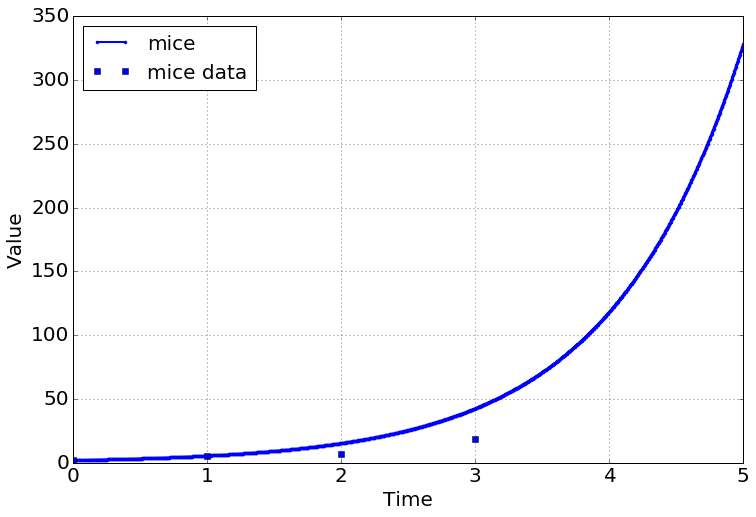

In [12]:
data_t=[0,1,2,3]
data_mouse=[2,5,7,19]

sim=Simulation()                    # get a simulation object

sim.add("mice'=b*mice - d*mice",    # the equations
    2,                            # initial value
    plot=True)                      # display a plot, which is the default

sim.add_data(t=data_t,mice=data_mouse,plot=True)
sim.params(b=1.1,d=0.08)            # specify the parameters
sim.run(5)

In [13]:
model=MCMCModel(sim,b=Uniform(0,10))

Sampling Prior...
Done.
0.22 s


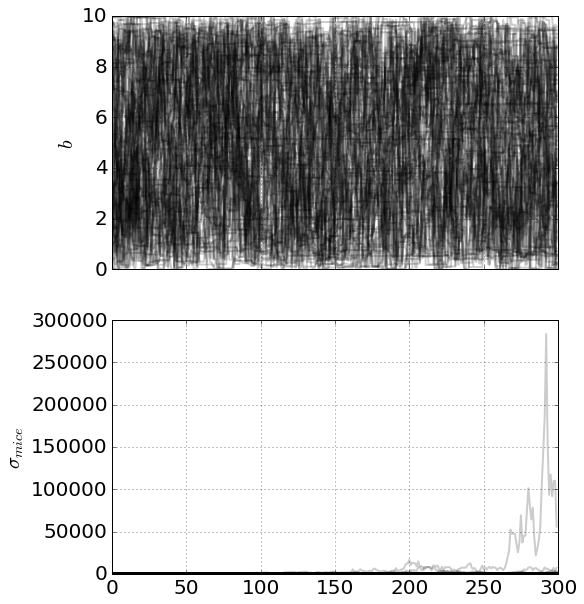

In [14]:
model.set_initial_values()
model.plot_chains()

Running MCMC...
Done.
25.08 s


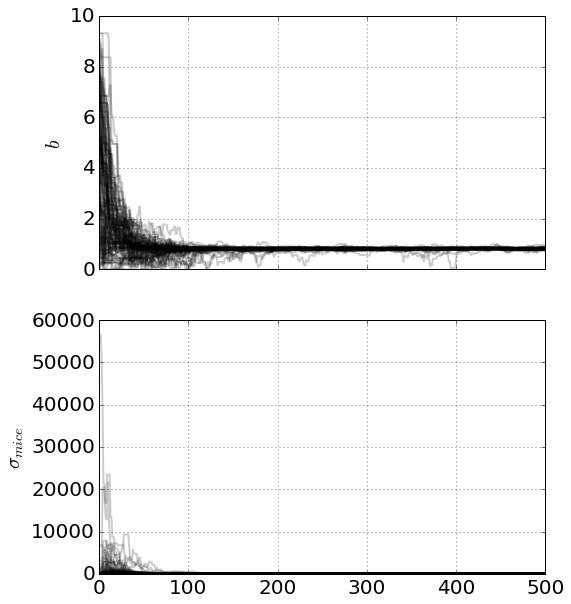

In [15]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
25.08 s


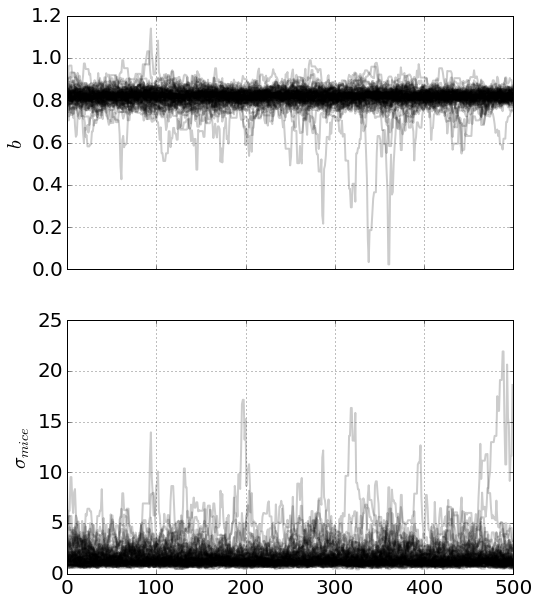

In [16]:
model.run_mcmc(500)
model.plot_chains()

In [17]:
model.best_estimates()

{'_sigma_mice': array([ 0.89397744,  1.28405693,  2.08736621]),
 'b': array([ 0.79509695,  0.82043268,  0.84277327])}

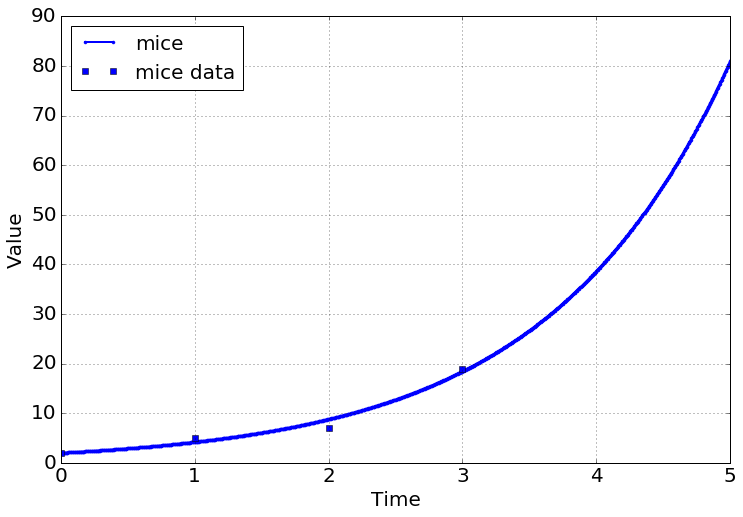

In [18]:
sim.run(5)

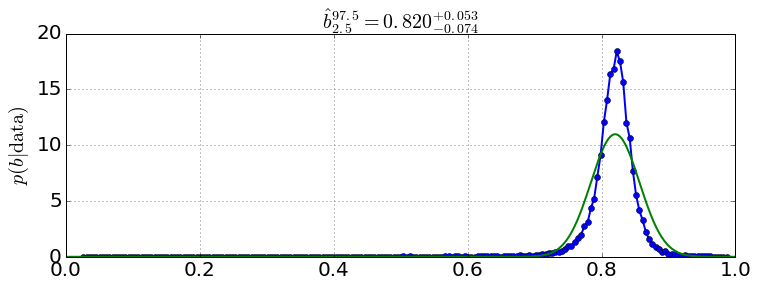

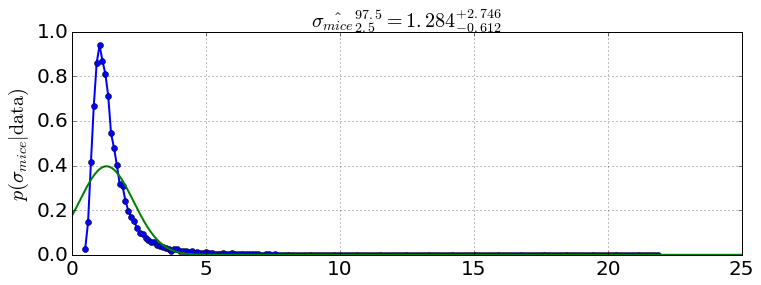

In [19]:
model.plot_distributions()

## A linear growth example

Data from [http://www.seattlecentral.edu/qelp/sets/009/009.html](http://www.seattlecentral.edu/qelp/sets/009/009.html)

### Plot the data

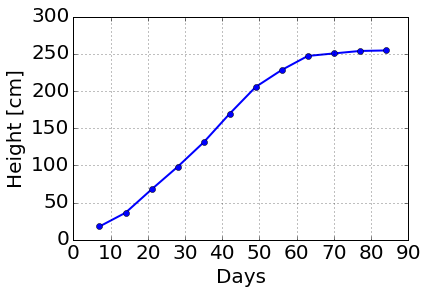

In [20]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

plot(t,h,'-o')
xlabel('Days')
ylabel('Height [cm]')

### Run an initial simulation

Here, the constant value ($a=1$) is hand-picked, and doesn't fit the data particularly well.

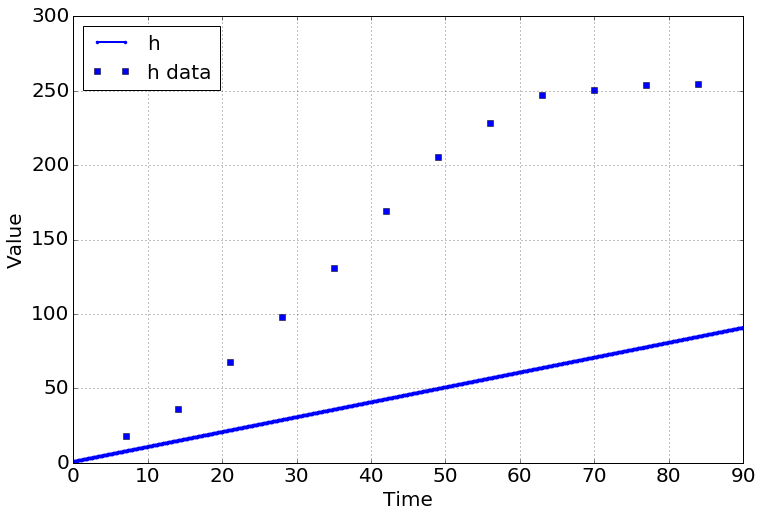

In [21]:
sim=Simulation()
sim.add("h'=a",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1)
sim.run(0,90)

### Fit the model parameter, $a$

Specifying the prior probability distribution for $a$ as uniform between -10 and 10.

In [22]:
model=MCMCModel(sim,a=Uniform(-10,10))

Sampling Prior...
Done.
0.22 s
Running MCMC...
Done.
16.28 s


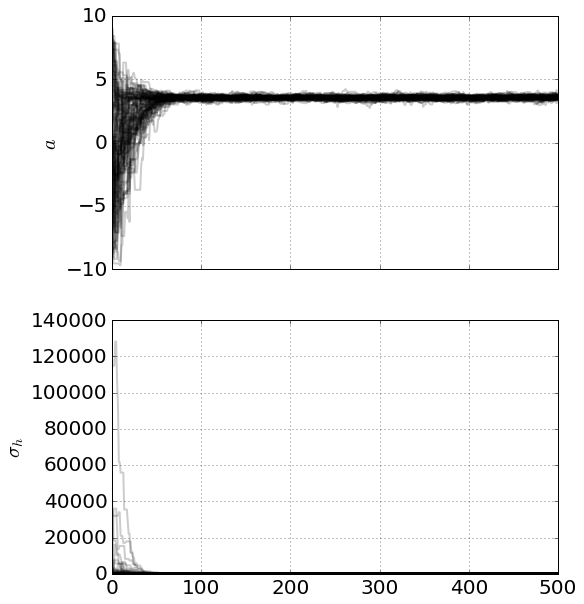

In [23]:
model.run_mcmc(500)
model.plot_chains()

What is the best fit parameter value?

In [24]:
model.best_estimates()

{'_sigma_h': array([ 18.59010935,  22.7134077 ,  28.93360442]),
 'a': array([ 3.41371568,  3.5387825 ,  3.66634657])}

### Rerun the model

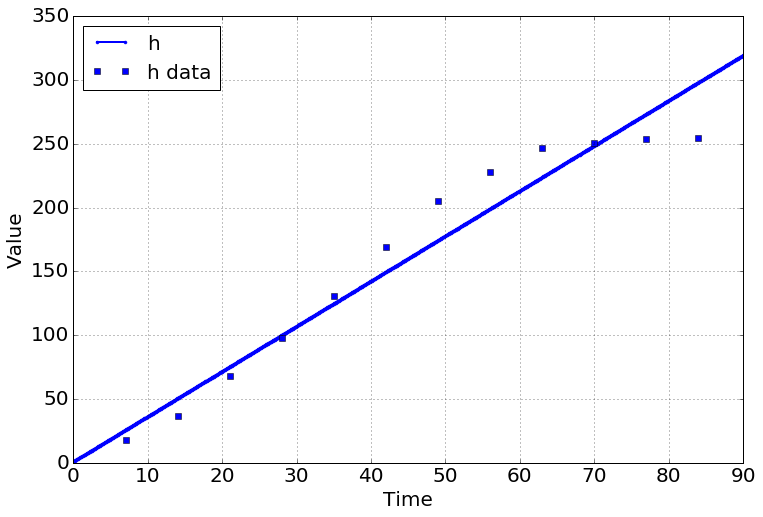

In [25]:
sim.run(0,90)

### Plot the posterior histogram

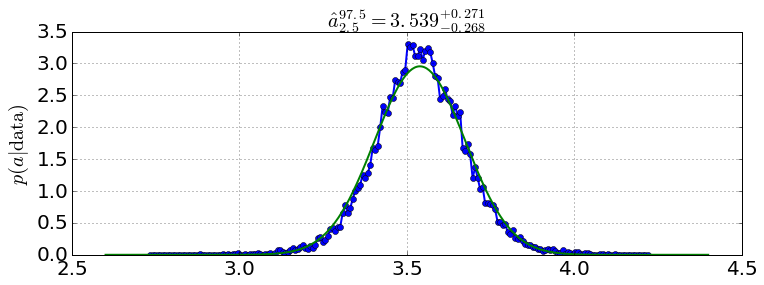

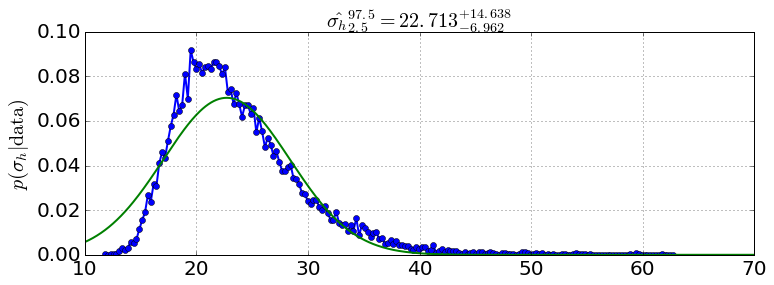

In [26]:
model.plot_distributions()

### Fit the model parameter, $a$, and the initial value of the variable, $h$

In [27]:
model=MCMCModel(sim,
                a=Uniform(-10,10),
                initial_h=Uniform(0,18),
                )

Sampling Prior...
Done.
0.28 s
Running MCMC...
Done.
13.98 s


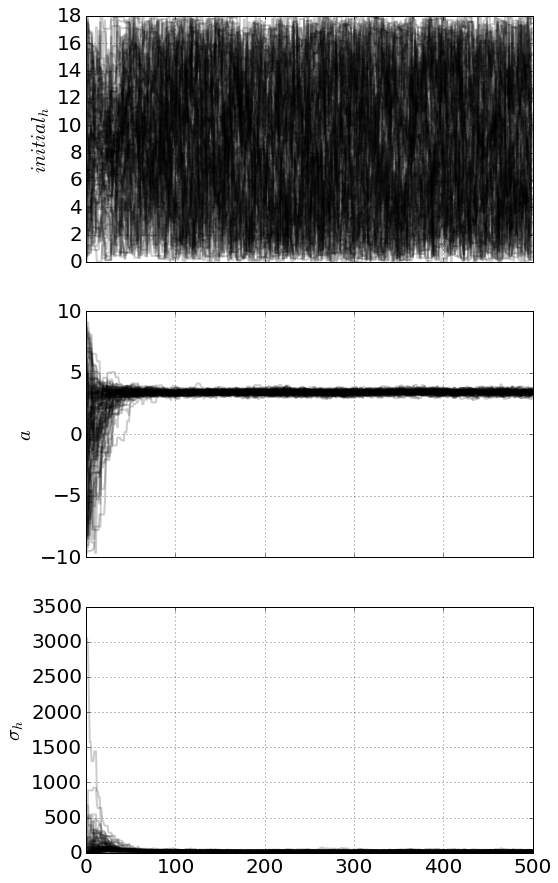

In [28]:
model.run_mcmc(500)
model.plot_chains()

this looks like initial_h is irrelevant - or perhaps our uniform range is too small.

In [29]:
model=MCMCModel(sim,
                a=Uniform(-10,10),
                initial_h=Uniform(0,180),
                )

Sampling Prior...
Done.
0.27 s
Running MCMC...
Done.
14.98 s


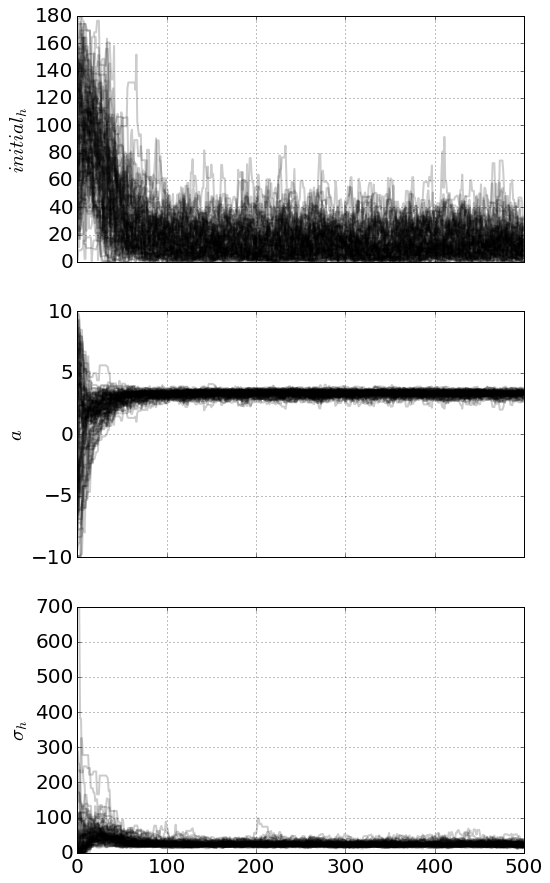

In [30]:
model.run_mcmc(500)
model.plot_chains()

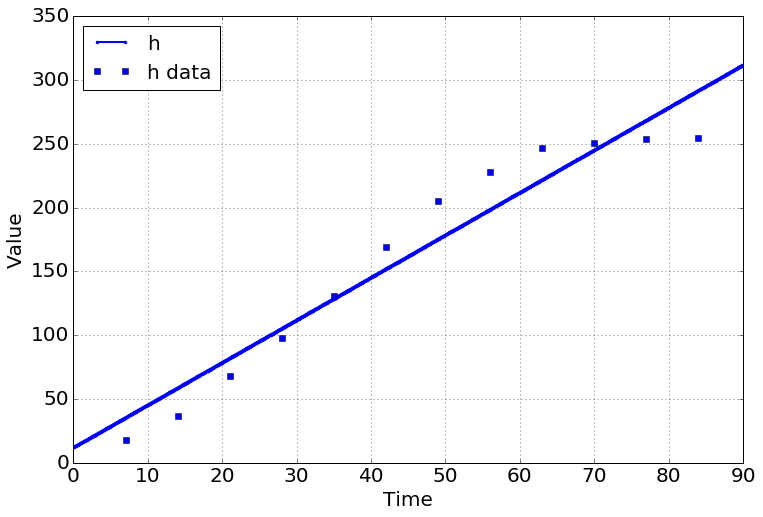

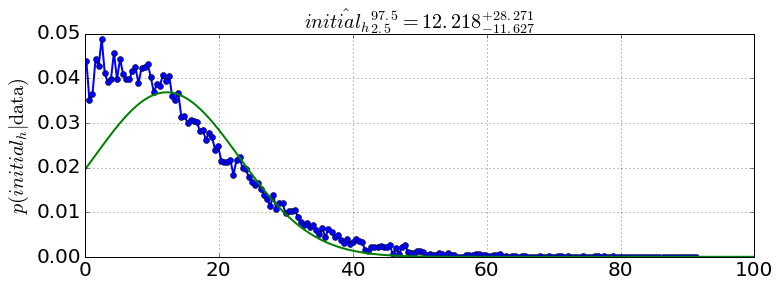

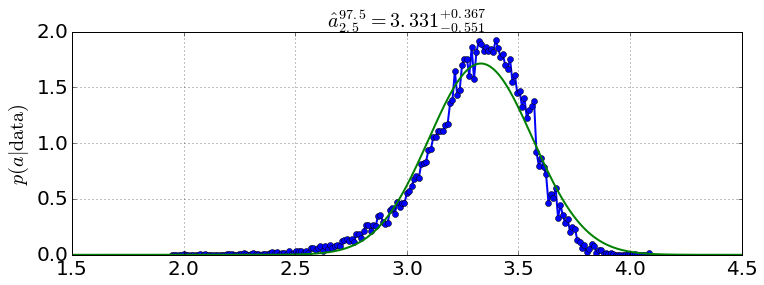

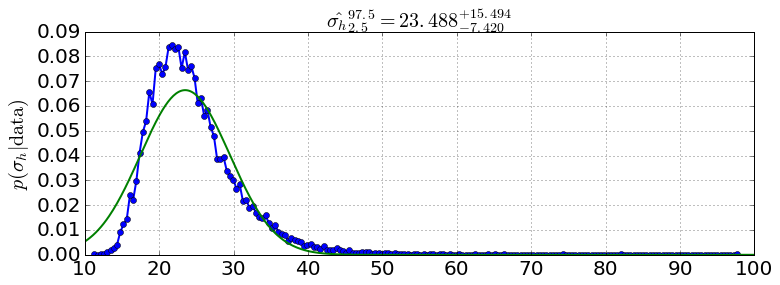

In [31]:
sim.run(0,90)
model.plot_distributions()

### Plot the simulations for many samplings of the simulation parameters

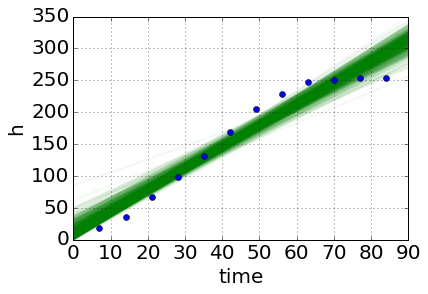

In [32]:
model.plot_many(0,90,'h')

## Logistic Model with the Same Data

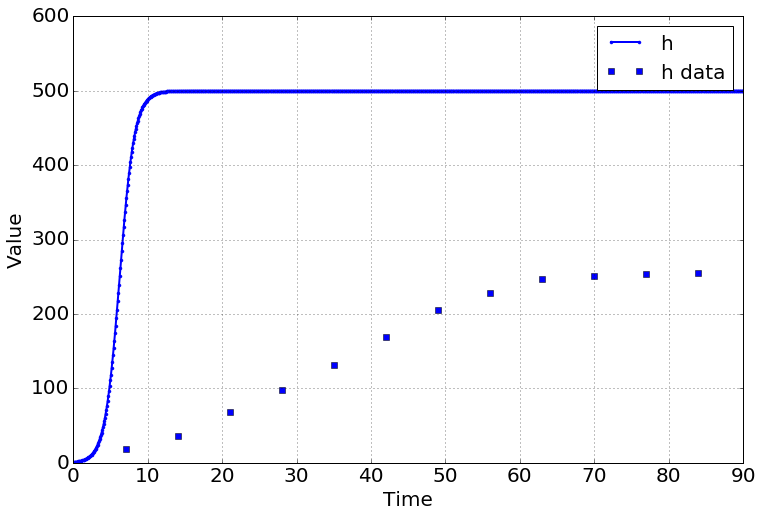

In [33]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

sim=Simulation()
sim.add("h'=a*h*(1-h/K)",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1,K=500)
sim.run(0,90)

# fig=sim.figures[0]
# fig.savefig('sunflower_logistic1.pdf')
# fig.savefig('sunflower_logistic1.png')

### Fit the model parameters, $a$ and $K$, and the initial value of the variable, $h$

In [34]:
model=MCMCModel(sim,
                a=Uniform(.001,5),
                K=Uniform(100,500),
                initial_h=Uniform(0,100),
                )

when it looks weird, run mcmc again which continues from where it left off

Sampling Prior...
Done.
0.41 s
Running MCMC...
Done.
34.10 s


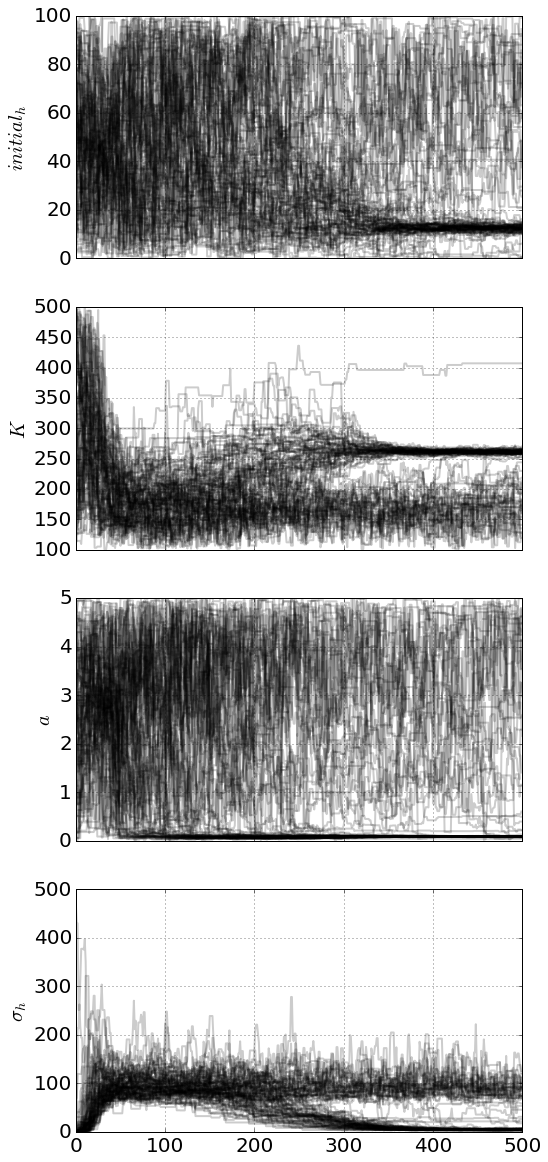

In [35]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
35.78 s


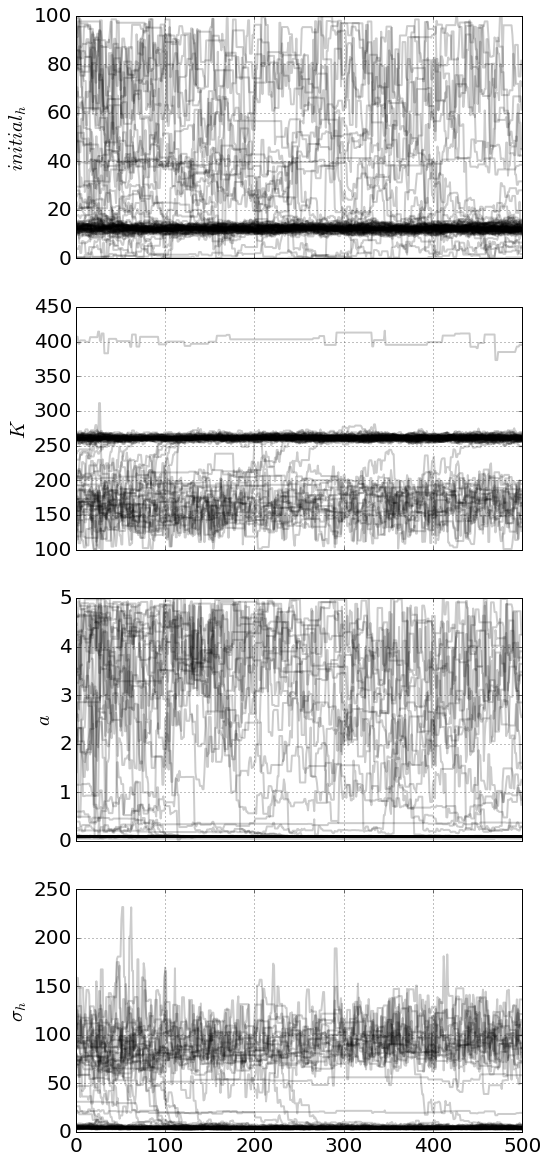

In [36]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
37.44 s


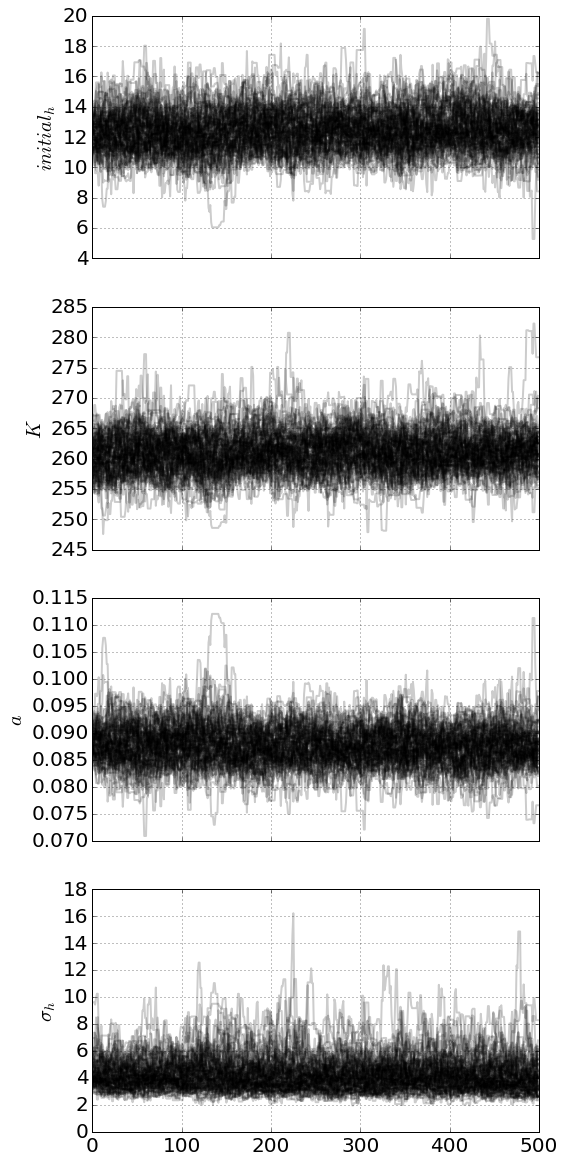

In [37]:
model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
model.run_mcmc(500)
model.plot_chains()

In [38]:
sim.a

0.087430589846442419

In [39]:
model.best_estimates()

{'K': array([ 258.39913477,  261.07560005,  263.87806155]),
 '_sigma_h': array([ 3.12987872,  3.91897192,  5.10865976]),
 'a': array([ 0.0844504 ,  0.08743059,  0.09054442]),
 'initial_h': array([ 11.2967091 ,  12.42457939,  13.65900321])}

### Plot the Results

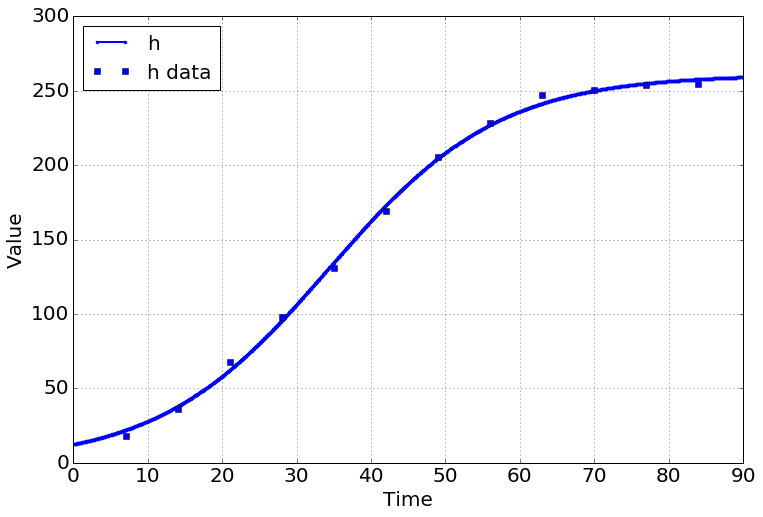

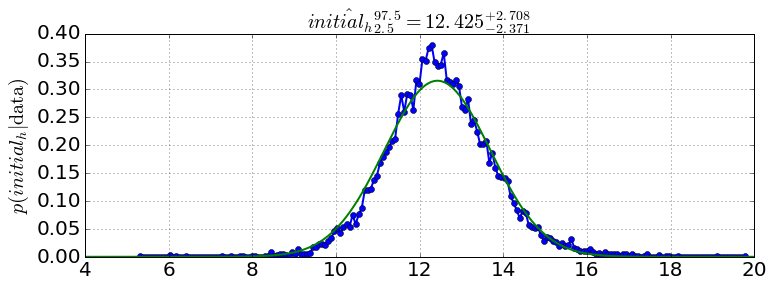

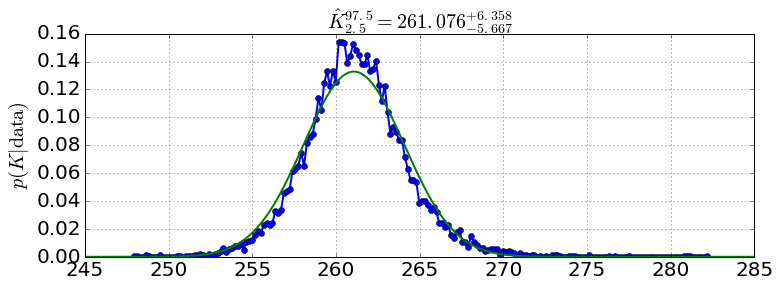

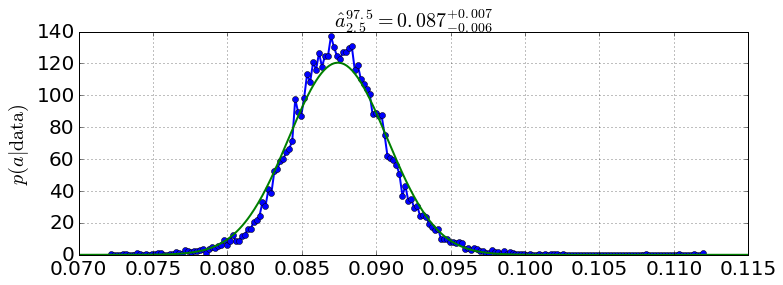

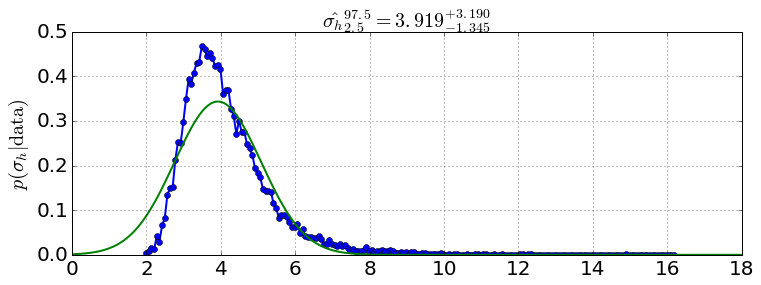

In [40]:
sim.run(0,90)
model.plot_distributions()


### Plot the joint distribution between parameters, $a$ and $K$

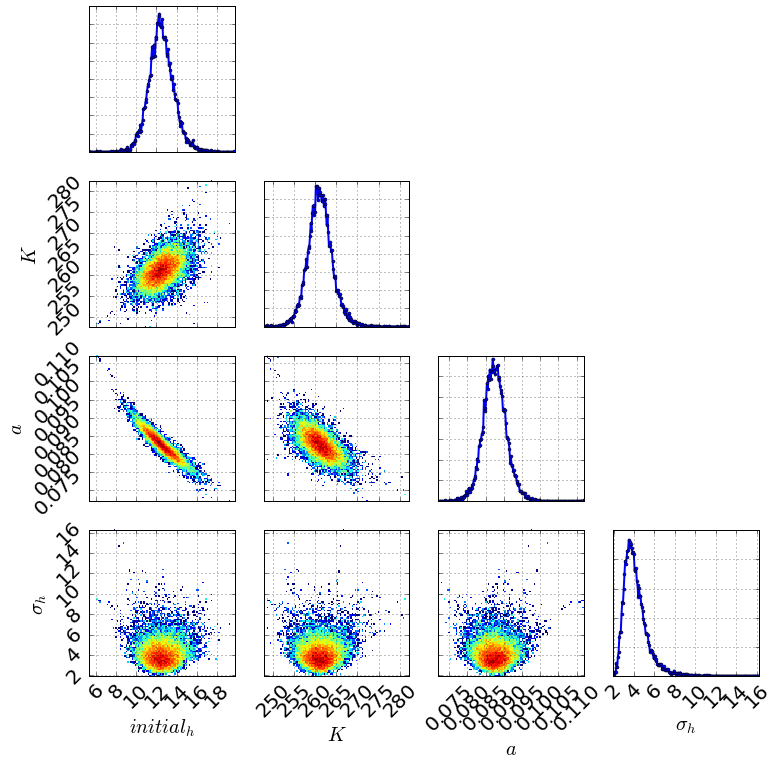

In [41]:
model.triangle_plot()

### Plot the many samples for predictions

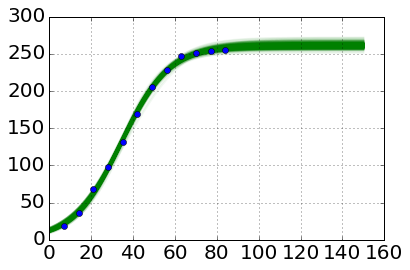

In [42]:
sim.noplots=True  # turn off the simulation plots
saved_h=[]
for i in range(500):
    model.draw()
    sim.run(0,150)
    plot(sim.t,sim.h,'g-',alpha=.05)
    saved_h.append(sim.h)
sim.noplots=False  # gotta love a double-negative
plot(t,h,'bo')  # plot the data
saved_h=array(saved_h)


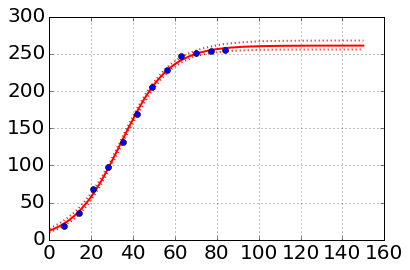

In [43]:
med=percentile(saved_h,50,axis=0)
lower=percentile(saved_h,2.5,axis=0)
upper=percentile(saved_h,97.5,axis=0)
plot(sim.t,med,'r-')
plot(sim.t,lower,'r:')
plot(sim.t,upper,'r:')

plot(t,h,'bo')  # plot the data


## SIR Model

http://healthyalgorithms.com/2010/10/19/mcmc-in-python-how-to-stick-a-statistical-model-on-a-system-dynamics-model-in-pymc/

In [44]:
from pyndamics import Simulation
from pyndamics.emcee import *

In [45]:
susceptible_data = np.array([999,997,996,994,993,992,990,989,986,984])
infected_data = np.array([1,2,5,6,7,8,9,11,13,15])

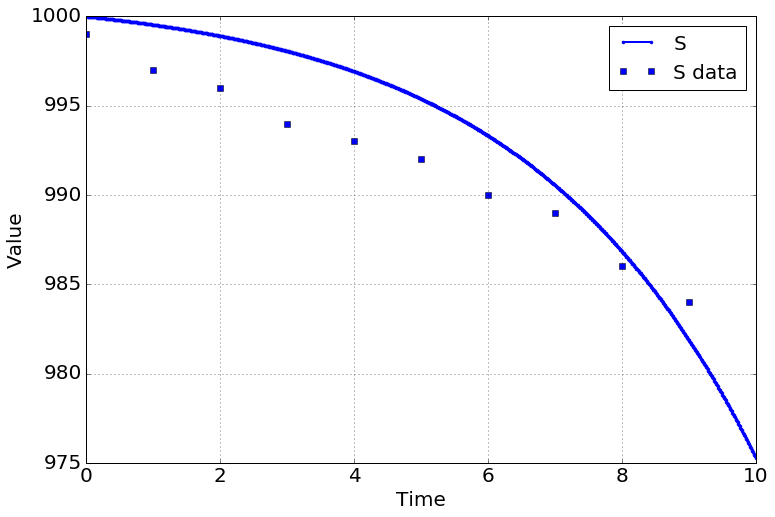

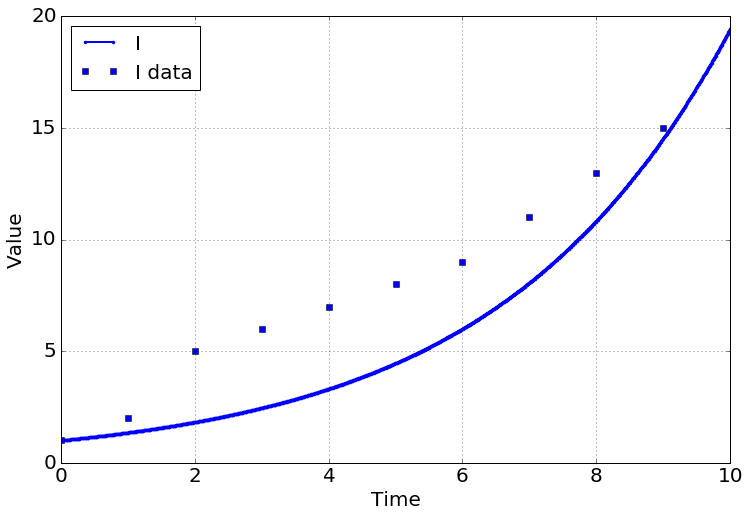

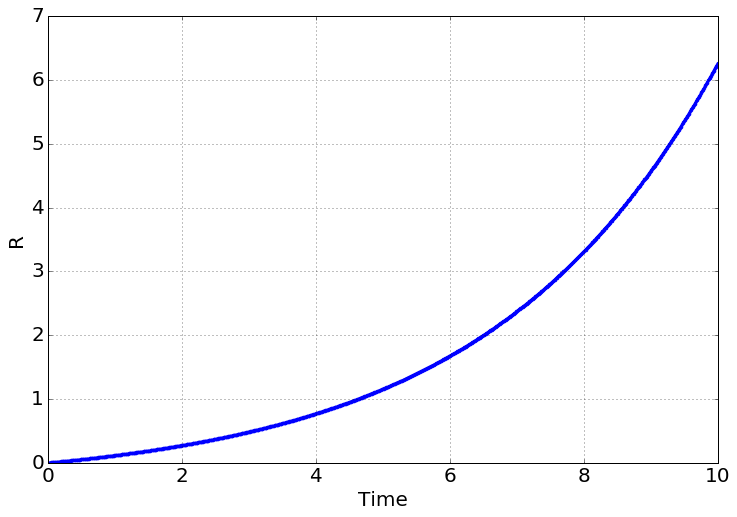

In [46]:
sim=Simulation()
sim.add("N=S+I+R")
sim.add("S'=-beta*S*I/N",1000,plot=1)
sim.add("I'=beta*S*I/N-gamma*I",1,plot=2)
sim.add("R'=gamma*I",0,plot=3)
sim.params(beta=.4,gamma=0.1)
t=np.arange(0,10,1)
sim.add_data(t=t,S=susceptible_data,plot=True)
sim.add_data(t=t,I=infected_data,plot=True)
sim.run(0,10)

In [47]:
model=MCMCModel(sim,
                beta=Uniform(0,1),
                initial_S=Uniform(500,1500),
                initial_I=Uniform(0.1,10),
                gamma=Uniform(0,1),
                )

Sampling Prior...
Done.
0.42 s
Running MCMC...
Done.
31.26 s


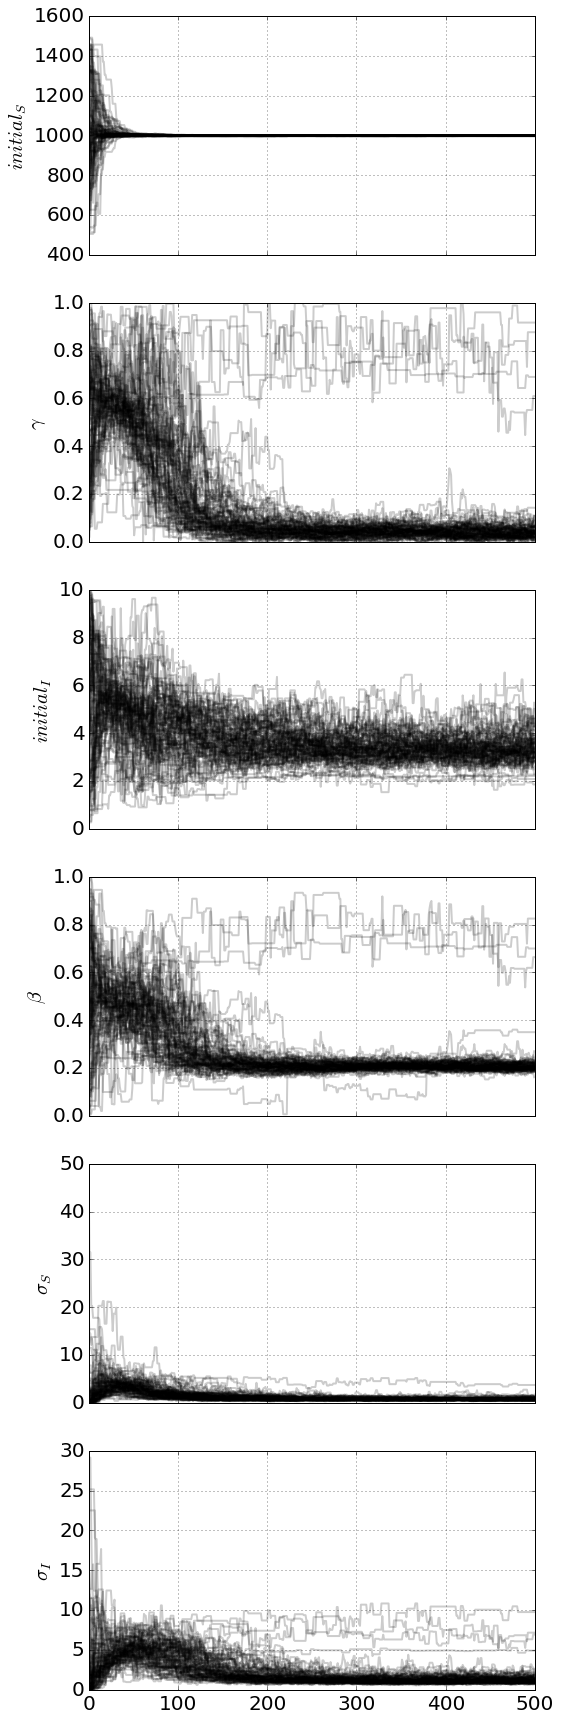

In [48]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
33.11 s


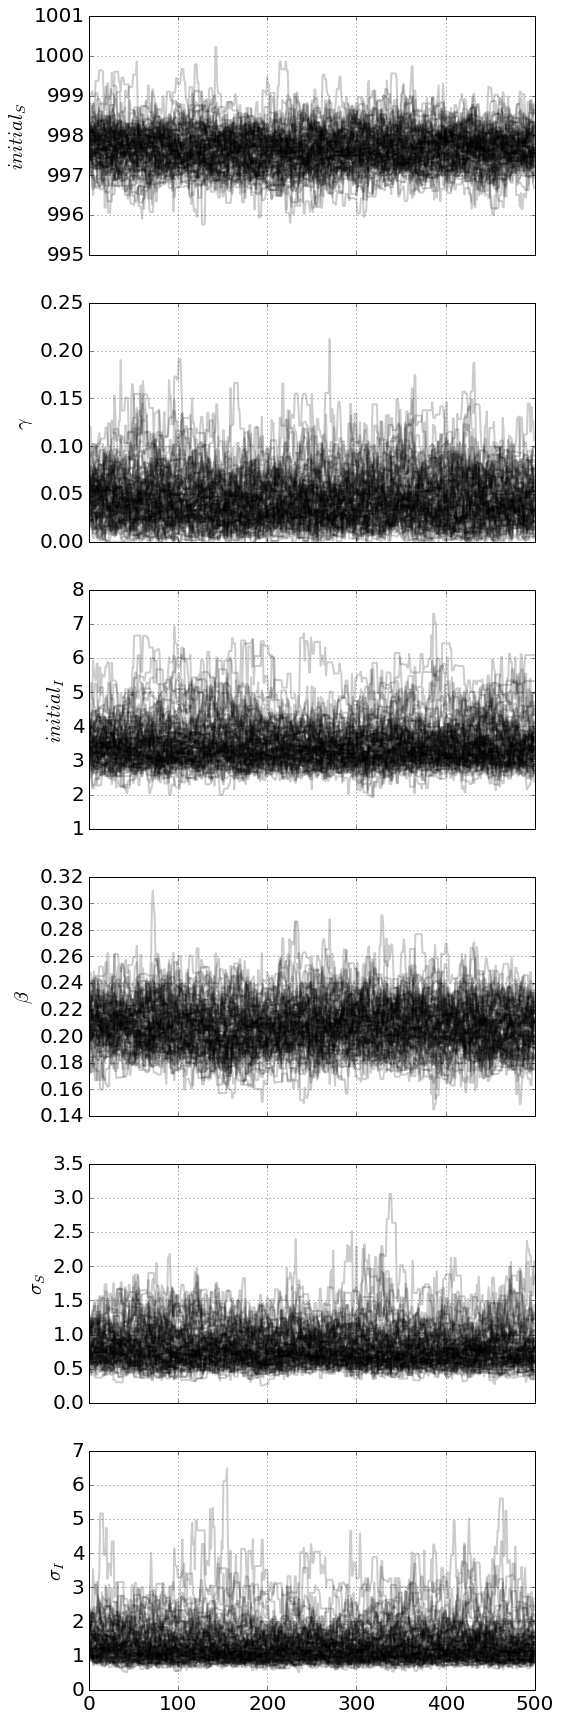

In [49]:
model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
model.run_mcmc(500)
model.plot_chains()

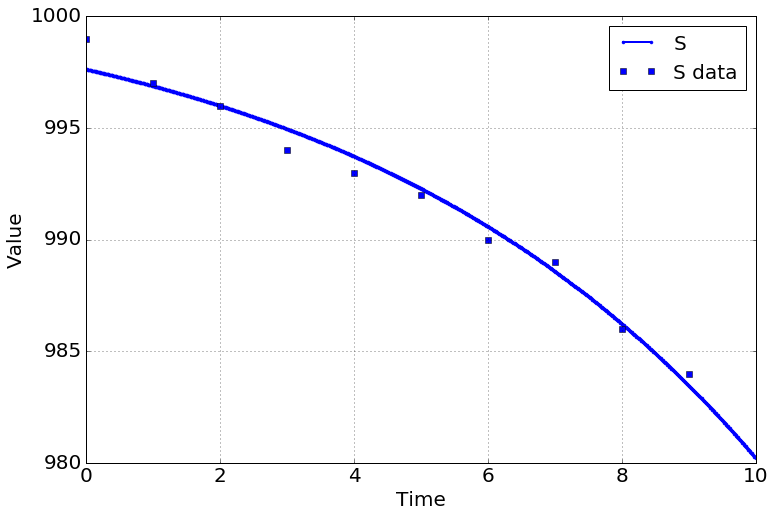

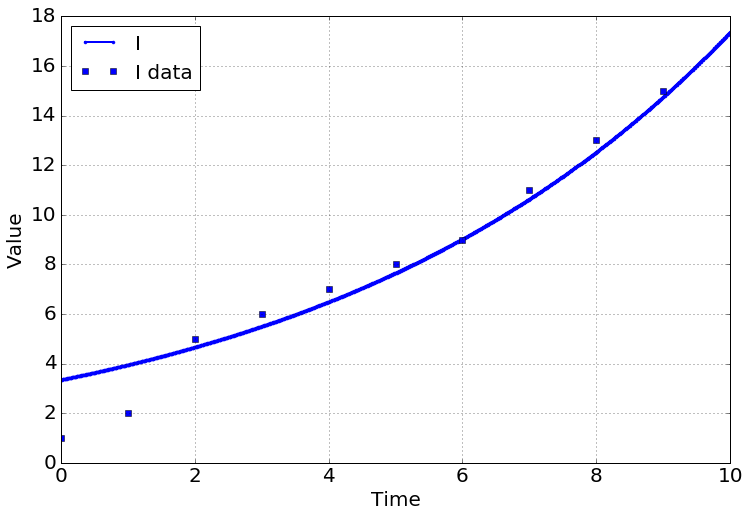

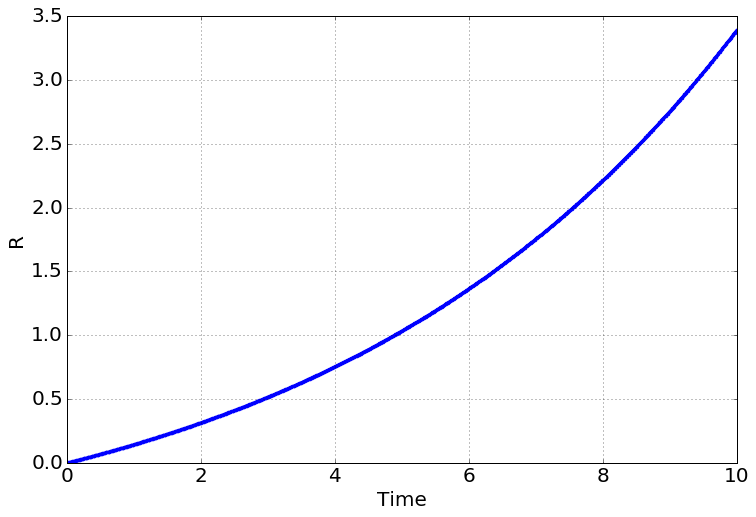

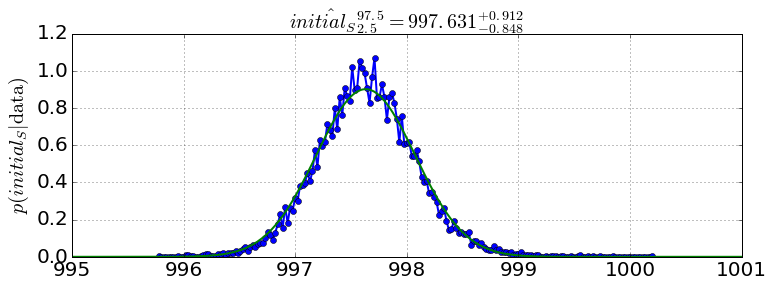

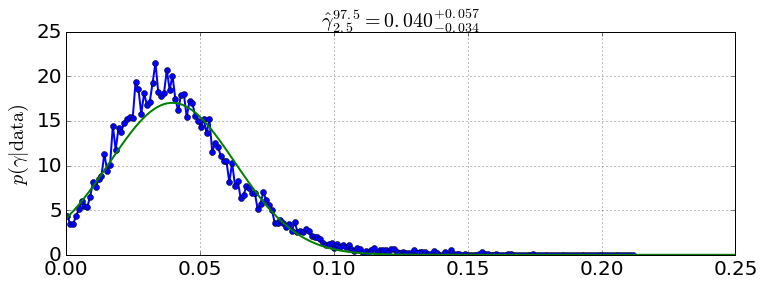

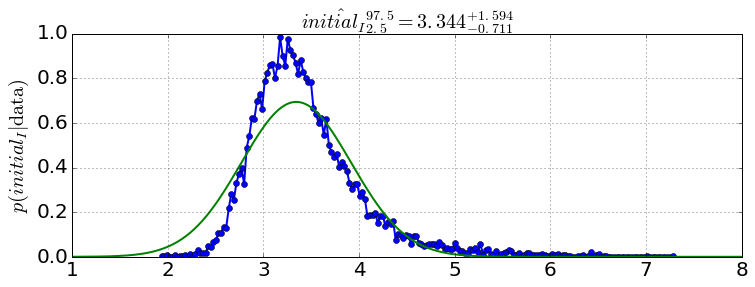

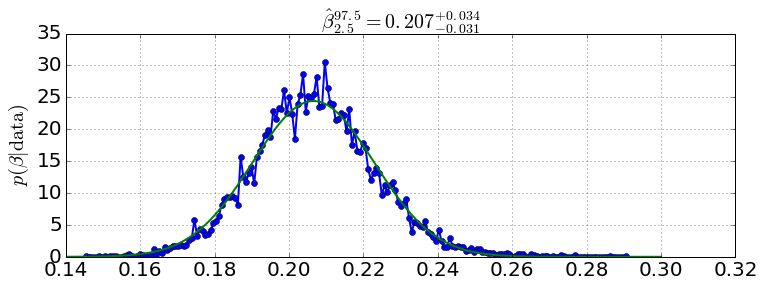

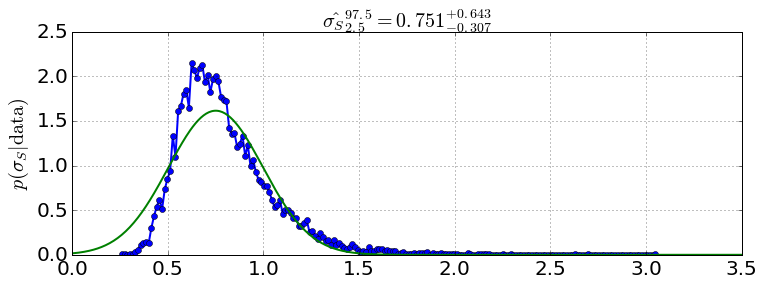

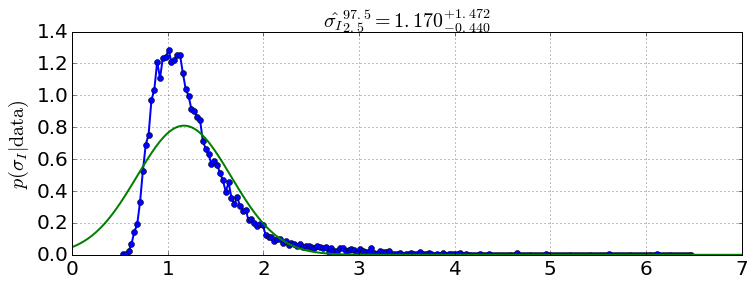

In [50]:
sim.run(0,10)
model.plot_distributions()

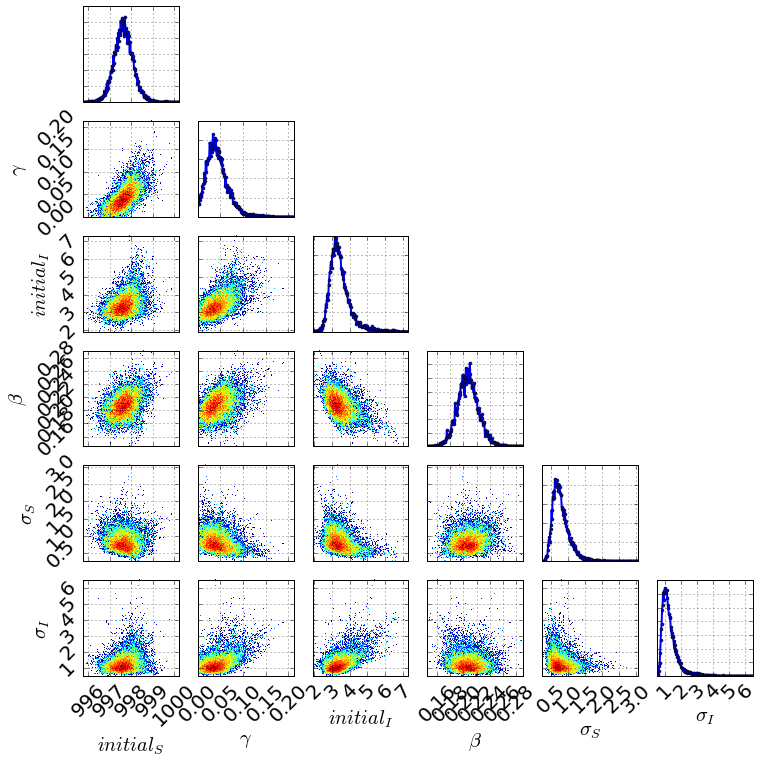

In [51]:
model.triangle_plot()

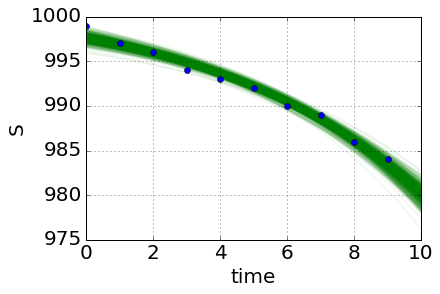

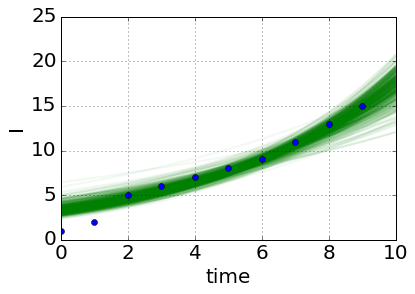

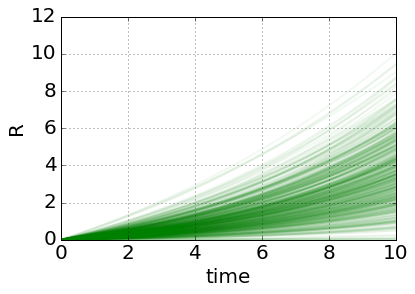

In [52]:
model.plot_many(0,10,('S','I','R'))